In [1]:
import contextily as ctx
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import LineString

In [2]:
path = "/home/tycho/CLS/2024-2025/Individual_Project/FabSim3/plugins/FabFlee/config_files/dflee_myanmar/input_csv/"

In [5]:
locations_df = pd.read_csv(path + "locations.csv")
edges_df = pd.read_csv(
    path + "routes.csv",
    header=None,
    names=["location_1", "location_2", "distance (km)"],
)

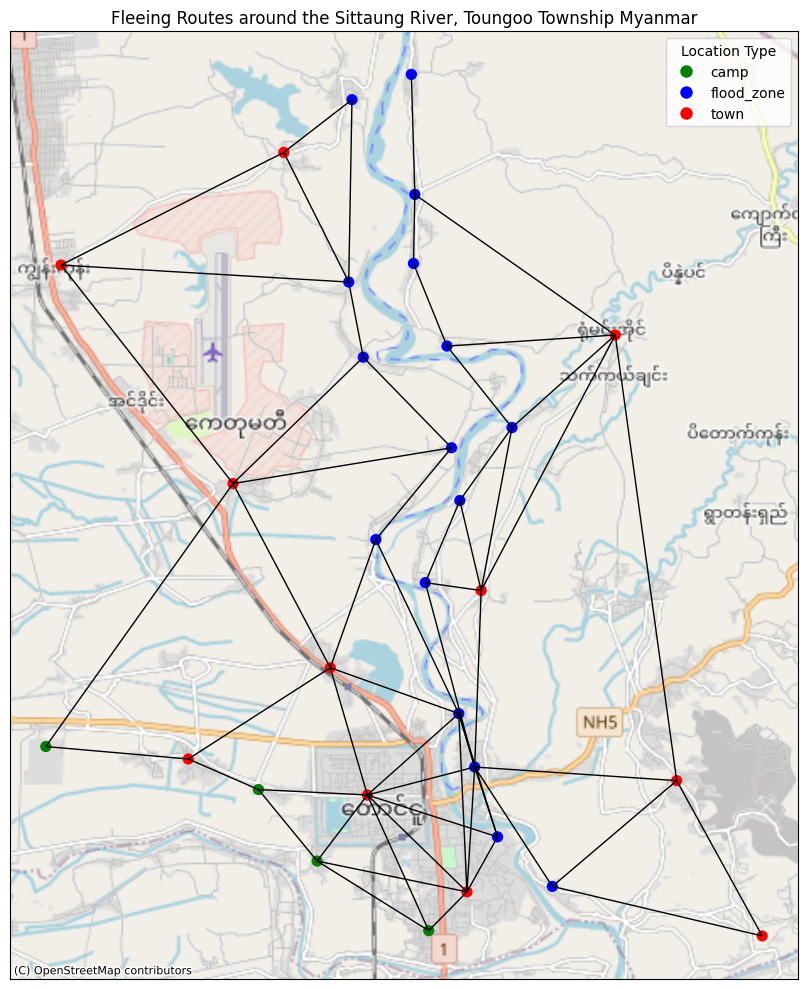

In [6]:
locations_gdf = gpd.GeoDataFrame(
    locations_df,
    geometry=gpd.points_from_xy(locations_df.longitude, locations_df.latitude),
)
locations_gdf.set_crs(epsg=4326, inplace=True)
location_dict = locations_gdf.set_index("#name")["geometry"].to_dict()

lines = [
    LineString([location_dict[row["location_1"]], location_dict[row["location_2"]]])
    for _, row in edges_df.iterrows()
    if row["location_1"] in location_dict and row["location_2"] in location_dict
]

edges_gdf = gpd.GeoDataFrame(geometry=lines)
edges_gdf.set_crs(epsg=4326, inplace=True)
locations_gdf = locations_gdf.to_crs(epsg=3857)
edges_gdf = edges_gdf.to_crs(epsg=3857)

location_type_colors = {
    "camp": "green",
    "flood_zone": "blue",
    "town": "red",
}
locations_gdf["color"] = locations_gdf["location_type"].map(location_type_colors)

fig, ax = plt.subplots(figsize=(10, 10))

edges_gdf.plot(ax=ax, color="black", linewidth=1, label="Edges")
locations_gdf.plot(ax=ax, c=locations_gdf["color"], markersize=50, label="Locations")

ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

legend_elements = [
    plt.Line2D(
        [0],
        [0],
        marker="o",
        color="w",
        label=loc_type,
        markerfacecolor=color,
        markersize=10,
    )
    for loc_type, color in location_type_colors.items()
]
ax.legend(handles=legend_elements, title="Location Type")

plt.title("Fleeing Routes around the Sittaung River, Toungoo Township Myanmar")
plt.tight_layout()
plt.show()